84.44000000000001
silhouetteScore :  0.5411904274163575


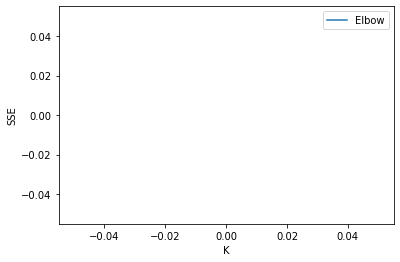

In [ ]:

# https://en.wikipedia.org/wiki/K-medoids
# https://docs.google.com/presentation/d/1pzY1YNG4e1BprTltQ4ARb-TG4MClJ0u9edn6ppVtmmY/edit?usp=sharing 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_boston
from sklearn import datasets
from sklearn.model_selection import train_test_split
import math
from sklearn import metrics
from sklearn.cluster import KMeans


data = pd.DataFrame((datasets.load_iris()).data)
target = pd.DataFrame((datasets.load_iris()).target)


df = data;


df = df.sample(frac = 1)



# number of clusters = k



def assign(m,nm):

  assignment = []
  for nmobject in nm : 
    euDistance = []
    for mobject in m:
      euDistance.append(np.linalg.norm(nmobject - mobject))

    
    assignment.append(euDistance.index(min(euDistance)))

  return assignment


def SSE(m, nm, assignment):

  score = 0
  for i in range(len(assignment)):
    score += np.linalg.norm(nm[i] - m[assignment[i]]) * np.linalg.norm(nm[i] - m[assignment[i]])

  return score

def silhouette(m, nm, k, assignment):

  clusters = {}

  for i in range(len(m)):
    clusters[i] = [m[i]]

  for i in range(len(assignment)):
    clusters[assignment[i]].append(nm[i])


  clusterWiseScore = []
  for i in range(k):
    avga = 0

    clusterObjectWiseScore = []
    for j in range(len(clusters[i])):
      a = 0
      b = 0
      for l in range(len(clusters[i])):

        if j != l:
          a += np.linalg.norm(clusters[i][j] - clusters[i][l])

      count = 0


      bjClusterWise = []

      for l in range(k):
        if i!=l :

          b = 0
          for x in clusters[l]:
            b += np.linalg.norm(clusters[i][j] - x)

          bjClusterWise.append(b/len(clusters[l]))

      if len(clusters[i]) > 1:
        a /= (len(clusters[i]) - 1) 
      b = min(bjClusterWise)

      clusterObjectWiseScore.append((b-a)/(max(a,b)))

    clusterWiseScore.append(sum(clusterObjectWiseScore)/len(clusterObjectWiseScore))

  
  return sum(clusterWiseScore)/len(clusterWiseScore)




def silhouetteScore(m,nm,k,assignment):
  assignmentNew = list(assignment)
  for index in range(k):
    assignmentNew.append(index)

  nmm = np.concatenate((nm,m),axis=0)
  silhouettescore = metrics.silhouette_score(nmm,assignmentNew, metric='euclidean')


  return silhouettescore

def plotData(m,nm,k,assignment):

  #Getting unique labels
  
  nmdf = pd.DataFrame(nm)
  nmdf['label'] = assignment
  centroids = pd.DataFrame(m)

  u_labels = np.unique(assignment)
  
  # 0    1   2   3  label
  # 1.2 2.2 3.2 4.2 0
  # 3.2 4.6 5.8 2.1 1
  # #plotting the results:

  for i in u_labels:
    plt.scatter(nmdf[nmdf['label']==i][0] , nmdf[nmdf['label'] == i][1] , label = i)
  plt.scatter(centroids[0] , centroids[1], s=100,label = 100)

  plt.legend()
  plt.show()  
  




def KMedoids(df,k):

  m = df.sample(n=k)
  nm = df.drop(m.index)
  m = list(m.values)
  nm = list(nm.values)

  assignment = assign(m,nm)
  currScore = SSE(m,nm,assignment)

  # print(currScore)

  # mnm = np.concatenate((nm,m),axis=0)
  
  # for i in range(k):
  #   assignment.append(i)

  # currScore = metrics.silhouette_score(mnm,assignment, metric='euclidean')

  mbestIndex = -1
  nmbestIndex = -1
  bestScore = currScore



  while True:

    assignment = assign(m,nm)
    # mnm = np.concatenate((nm,m),axis=0)
    # for i in range(k):
    #   assignment.append(i)
    
    # currScore = metrics.silhouette_score(mnm,assignment, metric='euclidean')

    currScore = SSE(m,nm,assignment)

    for i in range(len(m)):
      for j in range(len(nm)):

        # list(x) returns copy of x
        mCopy = list(m)
        nmCopy = list(nm)
        
        mCopy[i],nmCopy[j] = nmCopy[j], mCopy[i]
        assignmentNew = assign(mCopy,nmCopy)

        # for index in range(k):
        #   assignmentNew.append(index)

        # mnm = np.concatenate((nmCopy,mCopy),axis=0)
        # currScoreNew = metrics.silhouette_score(mnm,assignmentNew, metric='euclidean')

        currScoreNew = SSE(mCopy,nmCopy,assignmentNew)

        if(bestScore > currScoreNew):
          bestScore = currScoreNew
          mbestIndex = i
          nmbestIndex = j

    
    # print(bestScore)
    if(bestScore == currScore):
      break

    m[mbestIndex],nm[nmbestIndex] = nm[nmbestIndex], m[mbestIndex]

    



  assignment = assign(m,nm)

  # for i in range(k):
  #   assignment.append(i)
  # mnm = np.concatenate((nm,m),axis=0)
  # currScoreNew = metrics.silhouette_score(mnm,assignment, metric='euclidean')

  currScore = SSE(m,nm,assignment)


  # print('Score : ',currScore)
  # print(assignment)

  return m,nm,assignment,currScore

  


scores = []
kval = []
# for i in range(1,11):
#   m,nm,assignment,score = KMedoids(df,i)
#   print(score)
#   scores.append(score)
#   kval.append(i)

k = 3

m,nm,assignment,score = KMedoids(df,k)


print(score)
print('silhouetteScore : ',silhouetteScore(m,nm,k,assignment))

plt.plot(kval,scores,label=str('Elbow'))
plt.xlabel("K")
# naming the y axis
plt.ylabel("SSE")
plt.legend()
plt.show()


  




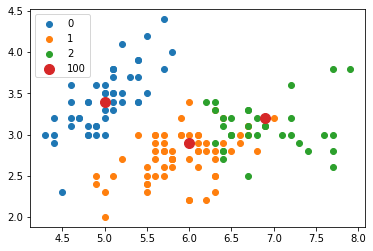

In [ ]:
plotData(m,nm,k,assignment)

In [ ]:
def updateCentroids(m,nm,k,assignment):
  clusters = {}

  for i in range(len(m)):
    clusters[i] = [m[i]]

  for i in range(len(assignment)):
    clusters[assignment[i]].append(nm[i])

  for i in range(k):
    clusters[i] = np.array(clusters[i])
    m[i] = clusters[i].sum(axis = 0)
    m[i] /= len(clusters[i])

  return m

  

def kMeans(df,k,maxIterations):
  m = df.sample(n=k)
  nm = df.drop(m.index)
  m = list(m.values)
  nm = list(nm.values)

  

  itr = 1

  while itr <= maxIterations :

    assignment = assign(m,nm)
    currScore = SSE(m,nm,assignment)
    m = updateCentroids(m,nm,k,assignment)

    itr += 1

  


  assignment = assign(m,nm)
  currScore = SSE(m,nm,assignment)
  print(currScore)

  return m,nm,assignment,currScore


'''

# manual Implementation
m,nm,assignment,currScore = kMeans(df,k,1000)

print('silhouetteScore : ',silhouetteScore(m,nm,k,assignment))


plotData(m,nm,k,assignment)

'''


# Inbuilt Implementation.
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

score = metrics.silhouette_score(df, labels, metric='euclidean')
print('Silhouetter Score: %.3f' % score)


  


Silhouetter Score: 0.553
